In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration for numeric features
## 1. load the data from "data/epi-recipes-num.csv"

In [2]:
df = pd.read_csv('../data/epi-recipes-num.csv')
df.shape

(35441, 15)

In [103]:
df2 = df.dropna()
df2.shape

(20630, 15)

In [4]:
df2.describe()

,rating,reviewcount,makeagain,nutritions.Calories,nutritions.Carbohydrates,nutritions.Cholesterol,nutritions.Fat,nutritions.Fiber,nutritions.Monounsaturated Fat,nutritions.Polyunsaturated Fat,nutritions.Protein,nutritions.Saturated Fat,nutritions.Sodium
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000
mean,3.095807,23.519098,79.447261,599.314154,47.841590,124.917693,35.154532,3.963209,14.429762,4.551381,23.578236,13.293311,598.730829
std,0.895434,39.688269,25.993800,2942.848877,547.414878,261.830501,107.104669,15.512508,49.352972,12.674339,87.864232,42.452752,1903.563872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,75.000000,248.000000,13.000000,26.000000,12.000000,1.000000,4.000000,1.000000,5.000000,4.000000,142.000000
50%,3.500000,11.000000,88.000000,405.000000,29.000000,73.000000,22.000000,3.000000,8.000000,2.000000,11.000000,8.000000,358.000000
75%,3.500000,27.000000,96.000000,648.750000,53.000000,151.000000,38.000000,5.000000,15.000000,5.000000,30.000000,14.000000,752.000000
max,4.000000,770.000000,100.000000,377239.000000,77371.000000,20077.000000,9124.000000,2085.000000,4288.000000,972.000000,10324.000000,4010.000000,241631.000000


## 2. deal with outliers

In [5]:
df2.columns

Index(['title', 'healthy', 'rating', 'reviewcount', 'makeagain',
       'nutritions.Calories', 'nutritions.Carbohydrates',
       'nutritions.Cholesterol', 'nutritions.Fat', 'nutritions.Fiber',
       'nutritions.Monounsaturated Fat', 'nutritions.Polyunsaturated Fat',
       'nutritions.Protein', 'nutritions.Saturated Fat', 'nutritions.Sodium'],
      dtype='object')

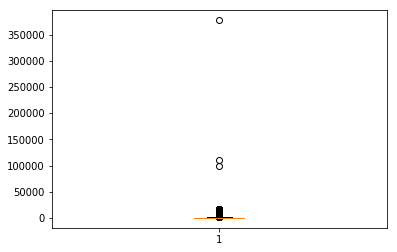

In [6]:
plt.boxplot(df2['nutritions.Calories'])
plt.show()

In [102]:
def rm_outliers(data, m=1):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [104]:
# 1st round
df2['calories'] = rm_outliers(df2['nutritions.Calories'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


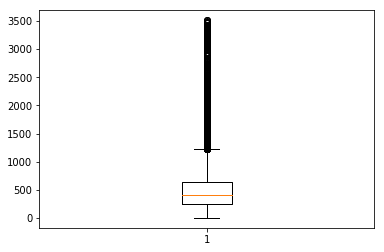

In [105]:
plt.boxplot(df2['calories'].dropna())
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


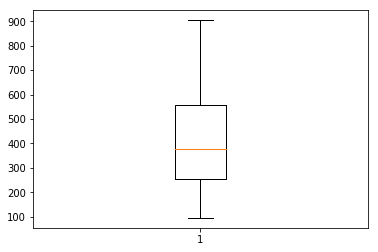

In [106]:
# 2nd round
df2['calories'] = rm_outliers(df2['calories'])
plt.boxplot(df2['calories'].dropna())
plt.show()

In [107]:
df3 = df2.dropna()
df3 = df3.drop(['calories'], axis=1)
df3.shape

(17064, 15)

## 3. data exploration & viz

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


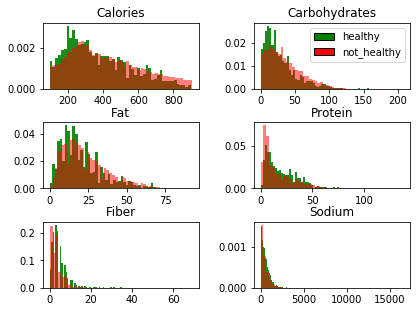

In [108]:
df_h = df3[df3.healthy == 1]
df_n = df3[df3.healthy == 0]

plt.figure(1)

plt.subplot(321)
plt.hist(df_h['nutritions.Calories'], bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Calories'], bins=50, normed=True, color='red', alpha=.5)
plt.title("Calories")

plt.subplot(322)
plt.hist(df_h['nutritions.Carbohydrates'], bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Carbohydrates'], bins=50, normed=True, color='red', alpha=.5)
plt.title("Carbohydrates")
from matplotlib.patches import Rectangle
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['green','red']]
labels= ['healthy','not_healthy']
plt.legend(handles, labels)

plt.subplot(323)
plt.hist(df_h['nutritions.Fat'], bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Fat'], bins=50, normed=True, color='red', alpha=.5)
plt.title("Fat")

plt.subplot(324)
plt.hist(df_h['nutritions.Protein'], bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Protein'], bins=50, normed=True, color='red', alpha=.5)
plt.title("Protein")

plt.subplot(325)
plt.hist(df_h['nutritions.Fiber'], bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Fiber'], bins=50, normed=True, color='red', alpha=.5)
plt.title("Fiber")

plt.subplot(326)
plt.hist(df_h['nutritions.Sodium'], bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n['nutritions.Sodium'], bins=50, normed=True, color='red', alpha=.5)
plt.title("Sodium")

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.5,wspace=0.35)

In [109]:
color = df3['healthy'].copy()
color[color==1] = 'green'
color[color==0] = 'pink'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22c6a0b8>,
      dtype=object)

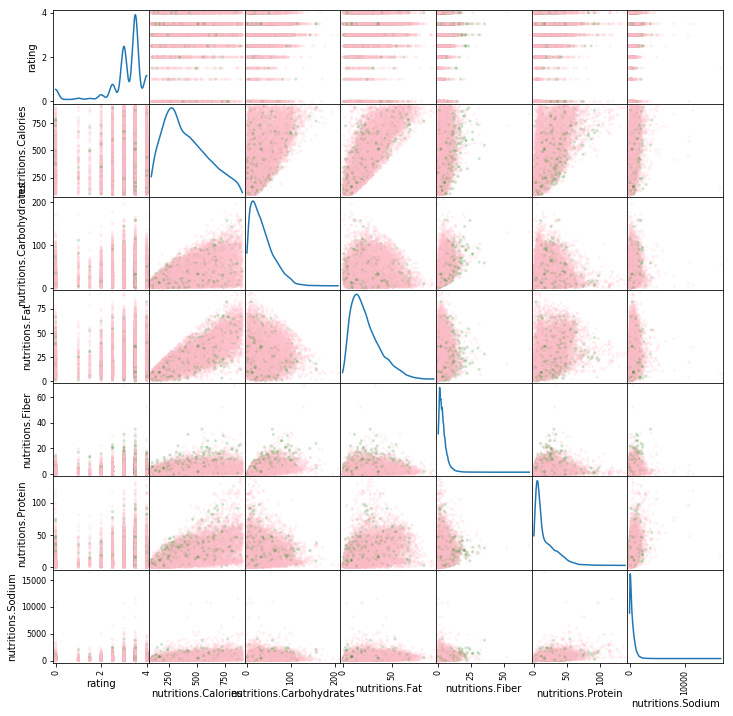

In [110]:
from pandas.plotting import scatter_matrix
scatter_matrix(df3.drop(['title', 'healthy', 'reviewcount', 'makeagain', 'nutritions.Cholesterol', 
                        'nutritions.Monounsaturated Fat', 'nutritions.Polyunsaturated Fat', 
                         'nutritions.Saturated Fat'], axis=1), alpha=0.2, figsize=(12, 12), diagonal='kde', c = color)

## 4. compute RRR and viz

The **ratio of recommended to restricted (RRR) food score**, published in 2004, was based on energy and the nutrients listed on the food label. The RRR food score computed the ratio of the “good” to the “bad” nutrients and to the energy content of the food. Six nutrients (protein, calcium, iron, vitamin A, vitamin C, and fiber) were defined a priori as desirable, whereas 5 nutrients (energy, saturated fat, cholesterol, sugar, and sodium) were defined as undesirable. The percentage DVs for all nutrients were calculated, and the mean percentage DV for the good nutrients was then divided by the mean percentage DV for the bad nutrients, such that  
RRR=(∑%DVrecommended/6)/(∑%DVrestricted/5)  

**DV based on:**  
https://www.netrition.com/rdi_page.html  
- 'nutritions.Calories': 2000 kcal  
- 'nutritions.Carbohydrates': 300 g  
- 'nutritions.Cholesterol': 300 mg  
- 'nutritions.Fat': 65 g  
- 'nutritions.Fiber': 25 g  
- 'nutritions.Protein': 50 g  
- 'nutritions.Saturated Fat': 20 g  
- 'nutritions.Sodium': 2400 mg  

modified RRR:  
(protein/50 + fiber/25)/2  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++  
(calories/2000 + SF/20 + cho/300 + carb/300 + sodium/2400)/5

In [111]:
df3["RRR"] = ((df3['nutritions.Protein']/50 + df3['nutritions.Fiber']/25)/2) / ((df3['nutritions.Calories']/2000 + df3['nutritions.Saturated Fat']/20 + df3['nutritions.Cholesterol']/300 + df3['nutritions.Carbohydrates']/300 + df3['nutritions.Sodium']/2400)/5)

In [112]:
df3.RRR.describe()

count    17064.000000
mean         0.990059
std          0.639077
min          0.000000
25%          0.504484
50%          0.879765
75%          1.312942
max          6.788247
Name: RRR, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2d6abf98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a22a12518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2d6abe10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2d6c4208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2d6c4198>],
 'means': []}

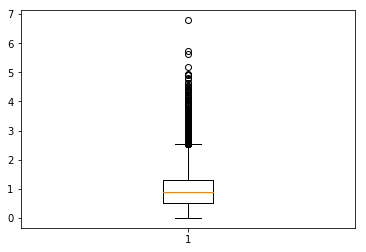

In [113]:
plt.boxplot(df3.RRR.dropna())

In [114]:
df3[df3.RRR >= 5 ]

,title,healthy,rating,reviewcount,makeagain,nutritions.Calories,nutritions.Carbohydrates,nutritions.Cholesterol,nutritions.Fat,nutritions.Fiber,nutritions.Monounsaturated Fat,nutritions.Polyunsaturated Fat,nutritions.Protein,nutritions.Saturated Fat,nutritions.Sodium,RRR
505,Thai Green Curry Paste,False,0.0,0.0,0.0,143.0,23.0,1.0,8.0,10.0,6.0,1.0,4.0,1.0,18.0,5.741627
19011,Sauteed Collard Greens,True,3.5,39.0,97.0,149.0,16.0,8.0,8.0,11.0,3.0,1.0,9.0,2.0,49.0,5.638072
19192,Spiced Tuna Steaks with Fennel and Red Peppers,False,3.0,10.0,91.0,354.0,16.0,66.0,12.0,7.0,7.0,4.0,44.0,1.0,146.0,5.167805
25104,Spring Vegetables with Shallots and Lemon,True,3.5,17.0,94.0,332.0,55.0,5.0,8.0,22.0,4.0,1.0,23.0,2.0,66.0,6.788247


In [115]:
df_h = df3[df3.healthy == True].dropna()
df_n = df3[df3.healthy == False].dropna()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'RRR')

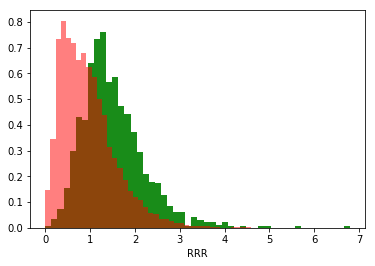

In [116]:
plt.hist(df_h['RRR'], bins=50, normed=True, color='green', alpha=.9)
plt.hist(df_n['RRR'], bins=50, normed=True, color='red', alpha=.5)
plt.xlabel("RRR")

So the healthy and unhealthy recipes have different distributions on RRR.